In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import os

In [3]:
inputs = keras.Input(shape=(28, 28, 1))

In [5]:
augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])
x = augmentation(inputs)

In [6]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

In [7]:
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

In [8]:
x = layers.MaxPooling2D(pool_size=2)(x)

In [9]:
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

In [10]:
x = layers.Flatten()(x)

In [11]:
outputs = layers.Dense(10, activation="softmax")(x)

In [12]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255

In [15]:
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

In [16]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.2809 - accuracy: 0.9101
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0927 - accuracy: 0.9707
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0692 - accuracy: 0.9775
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0601 - accuracy: 0.9816
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0529 - accuracy: 0.9838


In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0314 - accuracy: 0.9903


[0.03136871010065079, 0.9902999997138977]

In [59]:
image = tf.keras.preprocessing.image.load_img("img.png", color_mode="grayscale", target_size=(28, 28), interpolation="bilinear")

In [60]:
image = np.array(image)

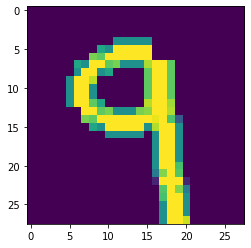

In [61]:
plt.imshow(image)

In [51]:
image = image.reshape([1, 28, 28])

In [52]:
model.predict(image)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
model_version = '0002'

In [ ]:
model_name = 'digits'

In [ ]:
model_path = os.path.join(model_name, model_version)

In [ ]:
model.save(model_path)

In [ ]:
cnn = keras.models.load_model(model_path)

In [ ]:
cnn.predict(test_images[0].reshape((1, 28, 28))).argmax()